In [159]:
import diplib as dip
import numpy as np
import os
import matplotlib.pyplot as plt

img_folder = 'images'

In [215]:
img = dip.ImageReadTIFF(f'{img_folder}/CamIm01.tif')
bin_img = 255 - dip.OtsuThreshold(img)
bin_img2 = dip.Closing(bin_img, dip.SE([20, 20]))
sgx = dip.SobelGradient(bin_img2, dimension=0)
sgy = dip.SobelGradient(bin_img2, dimension=1)
edge_img = dip.Sqrt(dip.Add(dip.Multiply(sgx, sgx), dip.Multiply(sgy, sgy)))

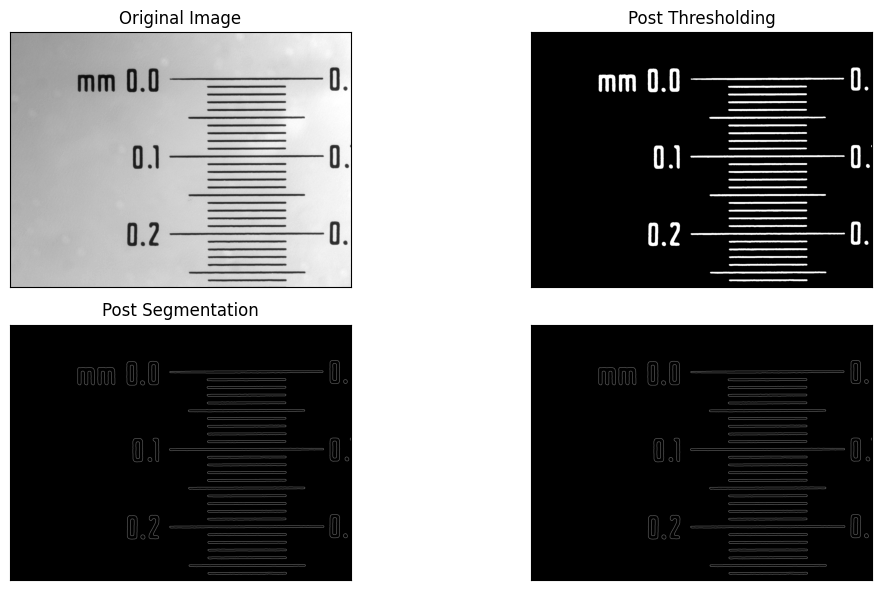

In [216]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
axs = axs.flatten()
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(bin_img, cmap='gray')
axs[1].set_title('Post Thresholding')
axs[2].imshow(edge_img, cmap='gray')
axs[2].set_title('Post Segmentation')
axs[3].imshow(edge_img, cmap='gray')

for i in range(4):
    axs[i].axes.get_xaxis().set_visible(False)
    axs[i].axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

In [228]:
mask = dip.Threshold(edge_img)[0]
mask = dip.Dilation(mask, 5)
mask = dip.AreaOpening(mask, filterSize=1000)

In [229]:
kernel = np.array([
    [1, 1, 1, 1],
    [0, 0, 0, 0],
    [-1, -1, -1, -1]
])

kernel = dip.Image(kernel)

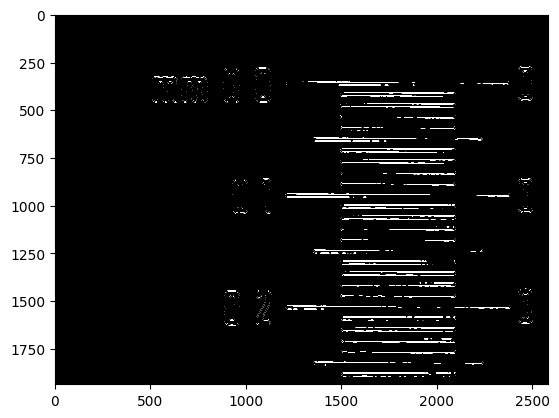

In [230]:
dip.ConvolveFT(mask, kernel).Show()

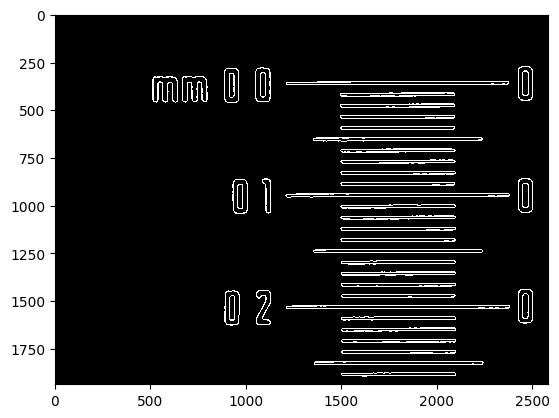

In [218]:
mask.Show()

In [220]:
mask = dip.Label(mask)
msr = dip.MeasurementTool.Measure(mask, edge_img, ['Gravity','GreyMajorAxes'])

In [221]:
msr

<Measurement with 3 features for 45 objects>

In [160]:
img.SetPixelSize(0.042, "mm")

# find edges
edges = dip.GradientMagnitude(img)

# binarize
mask = dip.Threshold(edges)[0]
mask = dip.Dilation(mask, 9)  # we want the mask to include the "tails" of the Gaussian
mask = dip.AreaOpening(mask, filterSize=1000)  # remove small regions

# measure the two edges
mask = dip.Label(mask)
msr = dip.MeasurementTool.Measure(mask, edges, ['Gravity','GreyMajorAxes'])
# msr[n] is the measurements for object with ID n, if we have two objects, n can be 1 or 2.

# get distance between edges
center1 = np.array(msr[1]['Gravity'])
center2 = np.array(msr[2]['Gravity'])

normal1 = np.array(msr[1]['GreyMajorAxes'])[0:2]  # first axis is perpendicular to edge
normal2 = np.array(msr[2]['GreyMajorAxes'])[0:2]
normal = (normal1 + normal2) / 2  # we average the two normals, assuming the edges are parallel

distance = abs((center1 - center2) @ normal)
units = msr['Gravity'].Values()[0].units
print("Distance between lines:", distance, units)

Distance between lines: 4.538572546368772 mm


In [166]:
msr[1]['Gravity']

[7.7597037284229815, 20.737838599135205]

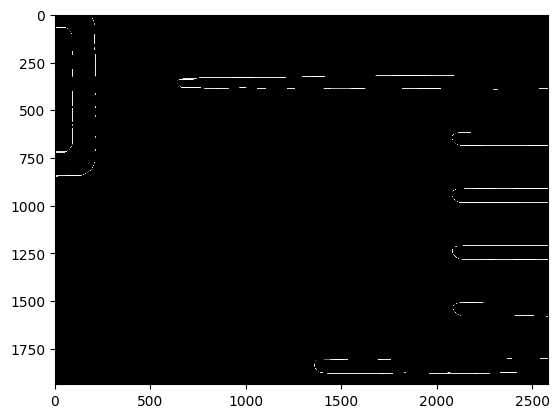

In [158]:
dip.Closing(dip.Closing(edge_img, dip.SE([100, 1])), 
                        dip.SE([100, 1])).Show()

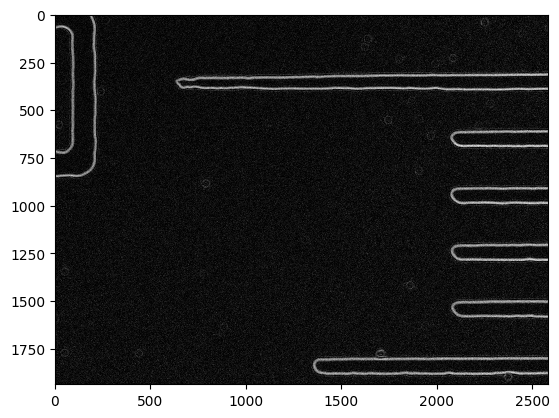

In [149]:
edges.Show()

In [ ]:
dip.MeasurementTool.Measure(mask, edges, ['Gravity','GreyMajorAxes'])